CONFUSION MATRIX

3.8.4


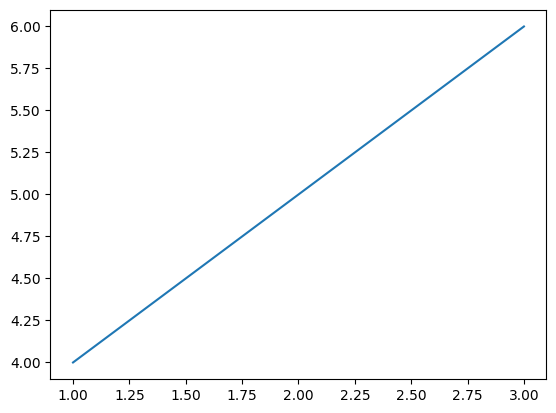

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

print(matplotlib.__version__)

plt.plot([1,2,3],[4,5,6])
plt.show()


              precision    recall  f1-score   support

         Dog       0.80      0.67      0.73         6
     Not Dog       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



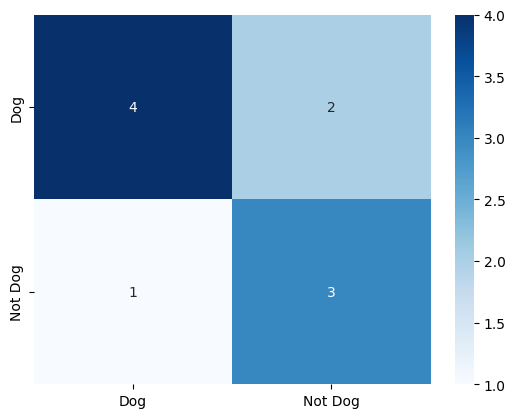

In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

actual=np.array(['Dog','Dog','Dog','Not Dog','Dog','Not Dog','Dog','Not Dog','Not Dog','Dog'])
predicted=np.array(['Dog','Not Dog','Dog','Not Dog','Dog','Dog','Not Dog','Not Dog','Not Dog','Dog'])
la=['Dog','Not Dog']
cm=confusion_matrix(actual,predicted,labels=la)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', xticklabels=['Dog', 'Not Dog'], yticklabels=['Dog', 'Not Dog'])

print(classification_report(actual,predicted,target_names=la))




In [6]:
import matplotlib
import seaborn

print(matplotlib.__version__)
print(seaborn.__version__)


3.8.4
0.13.2


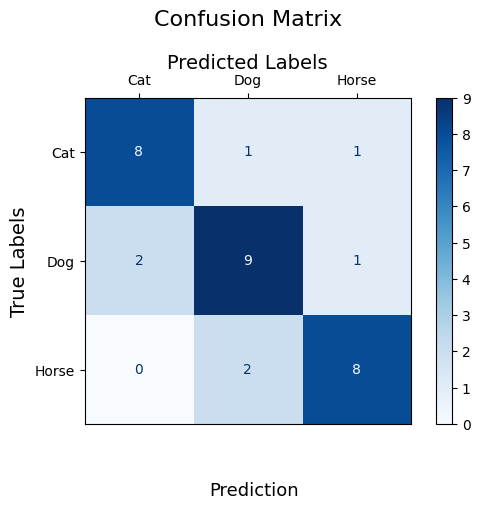

              precision    recall  f1-score   support

         Cat       0.80      0.80      0.80        10
         Dog       0.75      0.75      0.75        12
       Horse       0.80      0.80      0.80        10

    accuracy                           0.78        32
   macro avg       0.78      0.78      0.78        32
weighted avg       0.78      0.78      0.78        32



In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
import matplotlib.pyplot as plt


y_true=['Cat']*10+['Dog']*12+['Horse']*10
y_pred=['Cat']*8+['Dog']*1+['Horse']*1 + ['Dog']*9+['Cat']*2+['Horse']*1 + ['Horse']*8+['Dog']*2
classes=['Cat','Dog','Horse']
cm=confusion_matrix(y_true,y_pred,labels=classes)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)


plt.title('Confusion Matrix',fontsize=16,pad=20)
plt.xlabel('Predicted Labels',fontsize=14)
plt.ylabel('True Labels',fontsize=14)

plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5,0.05,'Prediction',ha='center',fontsize=13)

plt.show()
print(classification_report(y_true,y_pred,target_names=classes))

In [16]:
from sklearn.metrics import f1_score

y_prediction=[0,1,2,2,2,2,1,0,2,1,0]
y_true=[0,0,0,1,1,1,2,2,2,2,2]
f1_Score_per_class=f1_score(y_true,y_prediction,average=None)
f1_micro=f1_score(y_true,y_prediction,average='micro')
f1_macro=f1_score(y_true,y_prediction,average='macro')
f1_weighted=f1_score(y_true,y_prediction,average='weighted')

print("F1 Score per class:",f1_Score_per_class)
print("F1 Score Micro:",f1_micro)
print("F1 Score Macro:",f1_macro)
print("F1 Score Weighted:",f1_weighted)


F1 Score per class: [0.33333333 0.         0.2       ]
F1 Score Micro: 0.18181818181818182
F1 Score Macro: 0.17777777777777778
F1 Score Weighted: 0.18181818181818182


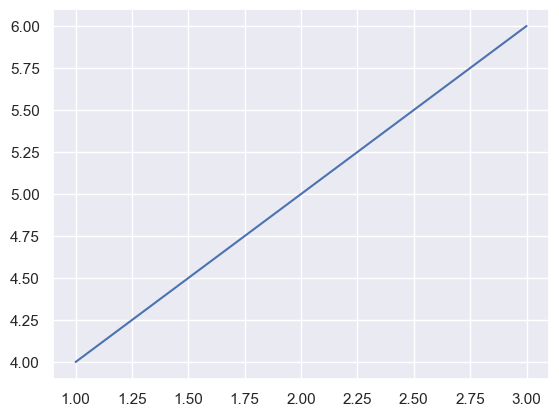

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
plt.plot([1, 2, 3], [4, 5, 6])
plt.show()


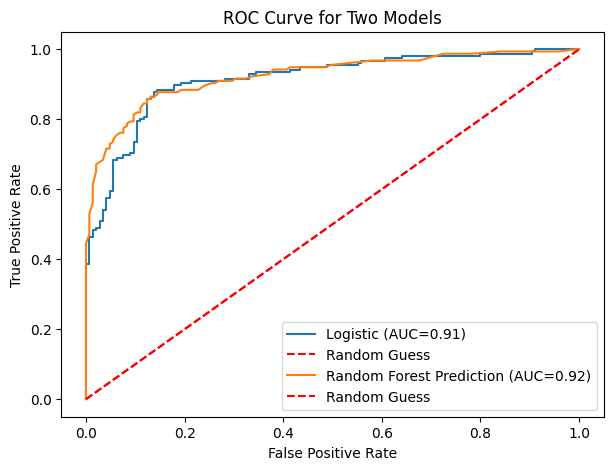

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc

x,y=make_classification(n_samples=1000,n_features=20,n_classes=2,random_state=42)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

logistic_model=LogisticRegression(random_state=42)
logistic_model.fit(x_train,y_train)

random_forest_model=RandomForestClassifier(n_estimators=100,random_state=42)
random_forest_model.fit(x_train,y_train)

y_pred_logistic=logistic_model.predict_proba(x_test)[:,1]
y_pred_rf=random_forest_model.predict_proba(x_test)[:,1]

test_df=pd.DataFrame({'True':y_test,'Logistic':y_pred_logistic,'Random Forest Prediction':y_pred_rf})

plt.figure(figsize=(7,5))

for model in ['Logistic','Random Forest Prediction']:
    fpr,tpr,_=roc_curve(test_df['True'],test_df[model])

    roc_auc=auc(fpr,tpr)
    plt.plot(fpr,tpr,label=f'{model} (AUC={roc_auc:.2f})')

    plt.plot([0,1],[0,1],'r--',label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Two Models')
plt.legend()
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

x,y=make_classification(n_samples=1000,n_features=20,n_classes=3,n_informative=10,random_state=42)
y_bin=label_binarize(y,classes=np.unique(y))

x_train,x_test,y_train,y_test=train_test_split(x,y_bin,test_size=0.2,random_state=42)